In [2]:
import matplotlib.pyplot as plt
from arch import arch_model
import pandas_ta
import pandas as pd
import numpy as np
import yfinance as yf
import os
import pandas_ta as ta
import matplotlib.ticker as mtick

In [3]:
ticker = "BEL.NS"

start_date="2019-01-01"
end_date="2022-10-10"

daily_df = yf.download(ticker, start=start_date, end=end_date)
daily_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,29.466665,29.583332,29.033333,29.150000,25.584557,10478028
2019-01-02,29.083332,30.083332,28.916666,29.900000,26.242821,30694161
2019-01-03,30.033333,30.283333,29.450001,29.600000,25.979519,39807891
2019-01-04,29.633333,30.716665,29.500000,30.616667,26.871828,34527270
2019-01-07,30.833332,31.066666,30.350000,30.466665,26.740175,24057507
...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228


In [4]:
daily_df.index = pd.to_datetime(daily_df.index)

In [5]:
intraday_df = pd.read_csv('BEL.csv')
intraday_df

,date,open,high,low,close,volume
0,2015-02-02 09:15:00+05:30,33.85,33.85,33.45,33.60,203148
1,2015-02-02 09:18:00+05:30,33.60,33.60,33.55,33.55,50886
2,2015-02-02 09:21:00+05:30,33.55,33.60,33.55,33.55,52272
3,2015-02-02 09:24:00+05:30,33.55,33.55,33.55,33.55,166122
4,2015-02-02 09:27:00+05:30,33.55,33.55,33.45,33.55,90288
...,...,...,...,...,...,...
236964,2022-10-10 15:15:00+05:30,104.50,104.70,104.40,104.60,112661
236965,2022-10-10 15:18:00+05:30,104.65,104.65,104.45,104.50,101749
236966,2022-10-10 15:21:00+05:30,104.45,104.50,104.35,104.50,146754
236967,2022-10-10 15:24:00+05:30,104.50,104.60,104.35,104.40,169364


In [6]:
# Convert the 'date' column to datetime
intraday_df['date'] = pd.to_datetime(intraday_df['date'])

# Create a new column 'date_only' by extracting the date part from the 'date' column
intraday_df['date_only'] = intraday_df['date'].dt.date

# Rename the 'date' column to 'datetime'
intraday_df = intraday_df.rename(columns={'date': 'datetime'})

# Optionally, rename 'date_only' back to 'date' if you want to keep the column name consistent
intraday_df = intraday_df.rename(columns={'date_only': 'date'})
intraday_df.head()

,datetime,open,high,low,close,volume,date
0,2015-02-02 09:15:00+05:30,33.85,33.85,33.45,33.60,203148,2015-02-02
1,2015-02-02 09:18:00+05:30,33.60,33.60,33.55,33.55,50886,2015-02-02
2,2015-02-02 09:21:00+05:30,33.55,33.60,33.55,33.55,52272,2015-02-02
3,2015-02-02 09:24:00+05:30,33.55,33.55,33.55,33.55,166122,2015-02-02
4,2015-02-02 09:27:00+05:30,33.55,33.55,33.45,33.55,90288,2015-02-02


In [7]:
intraday_df = intraday_df.set_index('datetime')

## Defining fuctions for GARCH model

In [8]:
### Calculating rolling 6 months variance of log returns

In [9]:
daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

In [10]:
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret
Date,,,,,,,
2019-01-01,29.466665,29.583332,29.033333,29.150000,25.584557,10478028,NaN
2019-01-02,29.083332,30.083332,28.916666,29.900000,26.242821,30694161,0.025404
2019-01-03,30.033333,30.283333,29.450001,29.600000,25.979519,39807891,-0.010084
2019-01-04,29.633333,30.716665,29.500000,30.616667,26.871828,34527270,0.033770
2019-01-07,30.833332,31.066666,30.350000,30.466665,26.740175,24057507,-0.004911
...,...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920,0.019505
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465,-0.025077
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228,0.035914


In [11]:
daily_df['variance'] = daily_df['log_ret'].rolling(180).var()
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance
Date,,,,,,,,
2019-01-01,29.466665,29.583332,29.033333,29.150000,25.584557,10478028,NaN,NaN
2019-01-02,29.083332,30.083332,28.916666,29.900000,26.242821,30694161,0.025404,NaN
2019-01-03,30.033333,30.283333,29.450001,29.600000,25.979519,39807891,-0.010084,NaN
2019-01-04,29.633333,30.716665,29.500000,30.616667,26.871828,34527270,0.033770,NaN
2019-01-07,30.833332,31.066666,30.350000,30.466665,26.740175,24057507,-0.004911,NaN
...,...,...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920,0.019505,0.000431
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465,-0.025077,0.000435
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228,0.035914,0.000441


<Axes: xlabel='Date'>

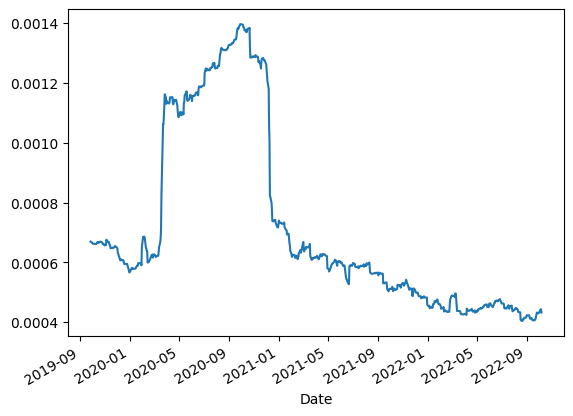

In [12]:
daily_df['variance'].plot()

In [13]:
def predict_volatility(x):
    
    best_model = arch_model(y=x,
                            p=2,
                            q=1).fit(update_freq=5,
                                     disp='off')
    
    variance_forecast = best_model.forecast(horizon=1).variance.iloc[-1,0]

    print(x.index[-1])
    
    return variance_forecast

daily_df['predictions'] = daily_df['log_ret'].rolling(180).apply(lambda x: predict_volatility(x))
daily_df

/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000666. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006628. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pytho

2019-09-27 00:00:00
2019-09-30 00:00:00
2019-10-01 00:00:00
2019-10-03 00:00:00
2019-10-04 00:00:00
2019-10-07 00:00:00
2019-10-09 00:00:00
2019-10-10 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006578. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006646. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2019-10-11 00:00:00
2019-10-14 00:00:00
2019-10-15 00:00:00
2019-10-16 00:00:00
2019-10-17 00:00:00
2019-10-18 00:00:00
2019-10-22 00:00:00
2019-10-23 00:00:00
2019-10-24 00:00:00
2019-10-25 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000658. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pytho

2019-10-27 00:00:00
2019-10-29 00:00:00
2019-10-30 00:00:00
2019-10-31 00:00:00
2019-11-01 00:00:00
2019-11-04 00:00:00
2019-11-05 00:00:00
2019-11-06 00:00:00
2019-11-07 00:00:00
2019-11-08 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006646. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006541. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2019-11-11 00:00:00
2019-11-13 00:00:00
2019-11-14 00:00:00
2019-11-15 00:00:00
2019-11-18 00:00:00
2019-11-19 00:00:00
2019-11-20 00:00:00
2019-11-21 00:00:00
2019-11-22 00:00:00
2019-11-25 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006511. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006496. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2019-11-26 00:00:00
2019-11-27 00:00:00
2019-11-28 00:00:00
2019-11-29 00:00:00
2019-12-02 00:00:00
2019-12-03 00:00:00
2019-12-04 00:00:00
2019-12-05 00:00:00
2019-12-06 00:00:00
2019-12-09 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006077. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006051. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2019-12-10 00:00:00
2019-12-11 00:00:00
2019-12-12 00:00:00
2019-12-13 00:00:00
2019-12-16 00:00:00
2019-12-17 00:00:00
2019-12-18 00:00:00
2019-12-19 00:00:00
2019-12-20 00:00:00
2019-12-23 00:00:00
2019-12-24 00:00:00
2019-12-26 00:00:00
2019-12-27 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005712. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005638. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2019-12-30 00:00:00
2019-12-31 00:00:00
2020-01-01 00:00:00
2020-01-02 00:00:00
2020-01-03 00:00:00
2020-01-06 00:00:00
2020-01-07 00:00:00
2020-01-08 00:00:00
2020-01-09 00:00:00
2020-01-10 00:00:00
2020-01-13 00:00:00
2020-01-14 00:00:00
2020-01-15 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000578. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005816. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pytho

2020-01-16 00:00:00
2020-01-17 00:00:00
2020-01-20 00:00:00
2020-01-21 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-24 00:00:00
2020-01-27 00:00:00
2020-01-28 00:00:00
2020-01-29 00:00:00
2020-01-30 00:00:00
2020-01-31 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006793. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006825. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006046. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006067. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2020-02-20 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006165. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006184. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2020-03-06 00:00:00
2020-03-09 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-23 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001057. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001086. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-03-24 00:00:00
2020-03-25 00:00:00
2020-03-26 00:00:00
2020-03-27 00:00:00
2020-03-30 00:00:00
2020-03-31 00:00:00
2020-04-01 00:00:00
2020-04-03 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001145. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001146. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-04-13 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00
2020-05-04 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001097. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001087. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-05-05 00:00:00
2020-05-06 00:00:00
2020-05-07 00:00:00
2020-05-08 00:00:00
2020-05-11 00:00:00
2020-05-12 00:00:00
2020-05-13 00:00:00
2020-05-14 00:00:00
2020-05-15 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00116. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001165. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.1

2020-05-18 00:00:00
2020-05-19 00:00:00
2020-05-20 00:00:00
2020-05-21 00:00:00
2020-05-22 00:00:00
2020-05-26 00:00:00
2020-05-27 00:00:00
2020-05-28 00:00:00
2020-05-29 00:00:00
2020-06-01 00:00:00
2020-06-02 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00115. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001149. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.1

2020-06-03 00:00:00
2020-06-04 00:00:00
2020-06-05 00:00:00
2020-06-08 00:00:00
2020-06-09 00:00:00
2020-06-10 00:00:00
2020-06-11 00:00:00
2020-06-12 00:00:00
2020-06-15 00:00:00
2020-06-16 00:00:00
2020-06-17 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001172. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001182. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-06-18 00:00:00
2020-06-19 00:00:00
2020-06-22 00:00:00
2020-06-23 00:00:00
2020-06-24 00:00:00
2020-06-25 00:00:00
2020-06-26 00:00:00
2020-06-29 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001185. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001185. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-06-30 00:00:00
2020-07-01 00:00:00
2020-07-02 00:00:00
2020-07-03 00:00:00
2020-07-06 00:00:00
2020-07-07 00:00:00
2020-07-08 00:00:00
2020-07-09 00:00:00
2020-07-10 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00124. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001235. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.1

2020-07-13 00:00:00
2020-07-14 00:00:00
2020-07-15 00:00:00
2020-07-16 00:00:00
2020-07-17 00:00:00
2020-07-20 00:00:00
2020-07-21 00:00:00
2020-07-22 00:00:00
2020-07-23 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001256. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00126. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.1

2020-07-24 00:00:00
2020-07-27 00:00:00
2020-07-28 00:00:00
2020-07-29 00:00:00
2020-07-30 00:00:00
2020-07-31 00:00:00
2020-08-03 00:00:00
2020-08-04 00:00:00
2020-08-05 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001249. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001249. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-08-06 00:00:00
2020-08-07 00:00:00
2020-08-10 00:00:00
2020-08-11 00:00:00
2020-08-12 00:00:00
2020-08-13 00:00:00
2020-08-14 00:00:00
2020-08-17 00:00:00
2020-08-18 00:00:00
2020-08-19 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001302. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001302. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-08-20 00:00:00
2020-08-21 00:00:00
2020-08-24 00:00:00
2020-08-25 00:00:00
2020-08-26 00:00:00
2020-08-27 00:00:00
2020-08-28 00:00:00
2020-08-31 00:00:00
2020-09-01 00:00:00
2020-09-02 00:00:00
2020-09-03 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-09-04 00:00:00
2020-09-07 00:00:00
2020-09-08 00:00:00
2020-09-09 00:00:00
2020-09-10 00:00:00
2020-09-11 00:00:00
2020-09-14 00:00:00
2020-09-15 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001338. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001338. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-09-16 00:00:00
2020-09-17 00:00:00
2020-09-18 00:00:00
2020-09-21 00:00:00
2020-09-22 00:00:00
2020-09-23 00:00:00
2020-09-24 00:00:00
2020-09-25 00:00:00
2020-09-28 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001388. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001388. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-09-29 00:00:00
2020-09-30 00:00:00
2020-10-01 00:00:00
2020-10-05 00:00:00
2020-10-06 00:00:00
2020-10-07 00:00:00
2020-10-08 00:00:00
2020-10-09 00:00:00
2020-10-12 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001362. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001362. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-10-13 00:00:00
2020-10-14 00:00:00
2020-10-15 00:00:00
2020-10-16 00:00:00
2020-10-19 00:00:00
2020-10-20 00:00:00
2020-10-21 00:00:00
2020-10-22 00:00:00
2020-10-23 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001281. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001278. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-10-26 00:00:00
2020-10-27 00:00:00
2020-10-28 00:00:00
2020-10-29 00:00:00
2020-10-30 00:00:00
2020-11-02 00:00:00
2020-11-03 00:00:00
2020-11-04 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001286. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001282. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-11-05 00:00:00
2020-11-06 00:00:00
2020-11-09 00:00:00
2020-11-10 00:00:00
2020-11-11 00:00:00
2020-11-12 00:00:00
2020-11-13 00:00:00
2020-11-14 00:00:00
2020-11-17 00:00:00
2020-11-18 00:00:00
2020-11-19 00:00:00
2020-11-20 00:00:00
2020-11-23 00:00:00
2020-11-24 00:00:00
2020-11-25 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001254. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001241. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-11-26 00:00:00
2020-11-27 00:00:00
2020-12-01 00:00:00
2020-12-02 00:00:00
2020-12-03 00:00:00
2020-12-04 00:00:00
2020-12-07 00:00:00
2020-12-08 00:00:00
2020-12-09 00:00:00
2020-12-10 00:00:00
2020-12-11 00:00:00
2020-12-14 00:00:00
2020-12-15 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001255. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.

2020-12-16 00:00:00
2020-12-17 00:00:00
2020-12-18 00:00:00
2020-12-21 00:00:00
2020-12-22 00:00:00
2020-12-23 00:00:00
2020-12-24 00:00:00
2020-12-28 00:00:00
2020-12-29 00:00:00
2020-12-30 00:00:00
2020-12-31 00:00:00
2021-01-01 00:00:00
2021-01-04 00:00:00
2021-01-05 00:00:00
2021-01-06 00:00:00
2021-01-07 00:00:00
2021-01-08 00:00:00
2021-01-11 00:00:00
2021-01-12 00:00:00
2021-01-13 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007354. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007327. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-01-14 00:00:00
2021-01-15 00:00:00
2021-01-18 00:00:00
2021-01-19 00:00:00
2021-01-20 00:00:00
2021-01-21 00:00:00
2021-01-22 00:00:00
2021-01-25 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-29 00:00:00
2021-02-01 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007136. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007069. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-02-02 00:00:00
2021-02-03 00:00:00
2021-02-04 00:00:00
2021-02-05 00:00:00
2021-02-08 00:00:00
2021-02-09 00:00:00
2021-02-10 00:00:00
2021-02-11 00:00:00
2021-02-12 00:00:00
2021-02-15 00:00:00
2021-02-16 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006218. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006219. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-02-17 00:00:00
2021-02-18 00:00:00
2021-02-19 00:00:00
2021-02-22 00:00:00
2021-02-23 00:00:00
2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-03-01 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006155. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006281. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-03-02 00:00:00
2021-03-03 00:00:00
2021-03-04 00:00:00
2021-03-05 00:00:00
2021-03-08 00:00:00
2021-03-09 00:00:00
2021-03-10 00:00:00
2021-03-12 00:00:00
2021-03-15 00:00:00
2021-03-16 00:00:00
2021-03-17 00:00:00
2021-03-18 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006406. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006331. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-03-19 00:00:00
2021-03-22 00:00:00
2021-03-23 00:00:00
2021-03-24 00:00:00
2021-03-25 00:00:00
2021-03-26 00:00:00
2021-03-30 00:00:00
2021-03-31 00:00:00
2021-04-01 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006057. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006057. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-04-05 00:00:00
2021-04-06 00:00:00
2021-04-07 00:00:00
2021-04-08 00:00:00
2021-04-09 00:00:00
2021-04-12 00:00:00
2021-04-13 00:00:00
2021-04-15 00:00:00
2021-04-16 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006121. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006109. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-04-19 00:00:00
2021-04-20 00:00:00
2021-04-22 00:00:00
2021-04-23 00:00:00
2021-04-26 00:00:00
2021-04-27 00:00:00
2021-04-28 00:00:00
2021-04-29 00:00:00
2021-04-30 00:00:00
2021-05-03 00:00:00
2021-05-04 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006231. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000624. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pytho

2021-05-05 00:00:00
2021-05-06 00:00:00
2021-05-07 00:00:00
2021-05-10 00:00:00
2021-05-11 00:00:00
2021-05-12 00:00:00
2021-05-14 00:00:00
2021-05-17 00:00:00
2021-05-18 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005724. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005758. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-05-19 00:00:00
2021-05-20 00:00:00
2021-05-21 00:00:00
2021-05-24 00:00:00
2021-05-25 00:00:00
2021-05-26 00:00:00
2021-05-27 00:00:00
2021-05-28 00:00:00
2021-05-31 00:00:00
2021-06-01 00:00:00
2021-06-02 00:00:00
2021-06-03 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006042. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006032. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-06-04 00:00:00
2021-06-07 00:00:00
2021-06-08 00:00:00
2021-06-09 00:00:00
2021-06-10 00:00:00
2021-06-11 00:00:00
2021-06-14 00:00:00
2021-06-15 00:00:00
2021-06-16 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005861. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005856. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-06-22 00:00:00
2021-06-23 00:00:00
2021-06-24 00:00:00
2021-06-25 00:00:00
2021-06-28 00:00:00
2021-06-29 00:00:00
2021-06-30 00:00:00
2021-07-01 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005846. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005854. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-07-02 00:00:00
2021-07-05 00:00:00
2021-07-06 00:00:00
2021-07-07 00:00:00
2021-07-08 00:00:00
2021-07-09 00:00:00
2021-07-12 00:00:00
2021-07-13 00:00:00
2021-07-14 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000592. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005921. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pytho

2021-07-15 00:00:00
2021-07-16 00:00:00
2021-07-19 00:00:00
2021-07-20 00:00:00
2021-07-22 00:00:00
2021-07-23 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005782. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005831. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-07-26 00:00:00
2021-07-27 00:00:00
2021-07-28 00:00:00
2021-07-29 00:00:00
2021-07-30 00:00:00
2021-08-02 00:00:00
2021-08-03 00:00:00
2021-08-04 00:00:00
2021-08-05 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005851. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005906. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-08-06 00:00:00
2021-08-09 00:00:00
2021-08-10 00:00:00
2021-08-11 00:00:00
2021-08-12 00:00:00
2021-08-13 00:00:00
2021-08-16 00:00:00
2021-08-17 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005942. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005951. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-08-18 00:00:00
2021-08-20 00:00:00
2021-08-23 00:00:00
2021-08-24 00:00:00
2021-08-25 00:00:00
2021-08-26 00:00:00
2021-08-27 00:00:00
2021-08-30 00:00:00
2021-08-31 00:00:00
2021-09-01 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005606. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005613. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-09-02 00:00:00
2021-09-03 00:00:00
2021-09-06 00:00:00
2021-09-07 00:00:00
2021-09-08 00:00:00
2021-09-09 00:00:00
2021-09-13 00:00:00
2021-09-14 00:00:00
2021-09-15 00:00:00
2021-09-16 00:00:00
2021-09-17 00:00:00
2021-09-20 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00056. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005607. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python

2021-09-21 00:00:00
2021-09-22 00:00:00
2021-09-23 00:00:00
2021-09-24 00:00:00
2021-09-27 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005006. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000505. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pytho

2021-10-01 00:00:00
2021-10-04 00:00:00
2021-10-05 00:00:00
2021-10-06 00:00:00
2021-10-07 00:00:00
2021-10-08 00:00:00
2021-10-11 00:00:00
2021-10-12 00:00:00
2021-10-13 00:00:00
2021-10-14 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005106. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005013. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-10-18 00:00:00
2021-10-19 00:00:00
2021-10-20 00:00:00
2021-10-21 00:00:00
2021-10-22 00:00:00
2021-10-25 00:00:00
2021-10-26 00:00:00
2021-10-27 00:00:00
2021-10-28 00:00:00
2021-10-29 00:00:00
2021-11-01 00:00:00
2021-11-02 00:00:00
2021-11-03 00:00:00
2021-11-04 00:00:00
2021-11-08 00:00:00
2021-11-09 00:00:00
2021-11-10 00:00:00
2021-11-11 00:00:00
2021-11-12 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005127. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000519. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pytho

2021-11-15 00:00:00
2021-11-16 00:00:00
2021-11-17 00:00:00
2021-11-18 00:00:00
2021-11-22 00:00:00
2021-11-23 00:00:00
2021-11-24 00:00:00
2021-11-25 00:00:00
2021-11-26 00:00:00
2021-11-29 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005094. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004905. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-11-30 00:00:00
2021-12-01 00:00:00
2021-12-02 00:00:00
2021-12-03 00:00:00
2021-12-06 00:00:00
2021-12-07 00:00:00
2021-12-08 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004971. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004945. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-12-09 00:00:00
2021-12-10 00:00:00
2021-12-13 00:00:00
2021-12-14 00:00:00
2021-12-15 00:00:00
2021-12-16 00:00:00
2021-12-17 00:00:00
2021-12-20 00:00:00
2021-12-21 00:00:00
2021-12-22 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004784. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004815. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2021-12-23 00:00:00
2021-12-24 00:00:00
2021-12-27 00:00:00
2021-12-28 00:00:00
2021-12-29 00:00:00
2021-12-30 00:00:00
2021-12-31 00:00:00
2022-01-03 00:00:00
2022-01-04 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004556. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004516. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-01-05 00:00:00
2022-01-06 00:00:00
2022-01-07 00:00:00
2022-01-10 00:00:00
2022-01-11 00:00:00
2022-01-12 00:00:00
2022-01-13 00:00:00
2022-01-14 00:00:00
2022-01-17 00:00:00
2022-01-18 00:00:00
2022-01-19 00:00:00
2022-01-20 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004595. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004681. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-01-21 00:00:00
2022-01-24 00:00:00
2022-01-25 00:00:00
2022-01-27 00:00:00
2022-01-28 00:00:00
2022-01-31 00:00:00
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-02-03 00:00:00
2022-02-04 00:00:00
2022-02-07 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004549. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00
2022-02-11 00:00:00
2022-02-14 00:00:00
2022-02-15 00:00:00
2022-02-16 00:00:00
2022-02-17 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004374. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004344. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-02-18 00:00:00
2022-02-21 00:00:00
2022-02-22 00:00:00
2022-02-23 00:00:00
2022-02-24 00:00:00
2022-02-25 00:00:00
2022-02-28 00:00:00
2022-03-02 00:00:00
2022-03-03 00:00:00
2022-03-04 00:00:00
2022-03-07 00:00:00
2022-03-08 00:00:00
2022-03-09 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004871. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004857. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-03-10 00:00:00
2022-03-11 00:00:00
2022-03-14 00:00:00
2022-03-15 00:00:00
2022-03-16 00:00:00
2022-03-17 00:00:00
2022-03-21 00:00:00
2022-03-22 00:00:00
2022-03-23 00:00:00
2022-03-24 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004246. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004245. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-03-25 00:00:00
2022-03-28 00:00:00
2022-03-29 00:00:00
2022-03-30 00:00:00
2022-03-31 00:00:00
2022-04-01 00:00:00
2022-04-04 00:00:00
2022-04-05 00:00:00
2022-04-06 00:00:00
2022-04-07 00:00:00
2022-04-08 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004393. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004365. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-04-11 00:00:00
2022-04-12 00:00:00
2022-04-13 00:00:00
2022-04-18 00:00:00
2022-04-19 00:00:00
2022-04-20 00:00:00
2022-04-21 00:00:00
2022-04-22 00:00:00
2022-04-25 00:00:00
2022-04-26 00:00:00
2022-04-27 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004302. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004301. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-04-28 00:00:00
2022-04-29 00:00:00
2022-05-02 00:00:00
2022-05-04 00:00:00
2022-05-05 00:00:00
2022-05-06 00:00:00
2022-05-09 00:00:00
2022-05-10 00:00:00
2022-05-11 00:00:00
2022-05-12 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004448. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004428. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-05-13 00:00:00
2022-05-16 00:00:00
2022-05-17 00:00:00
2022-05-18 00:00:00
2022-05-19 00:00:00
2022-05-20 00:00:00
2022-05-23 00:00:00
2022-05-24 00:00:00
2022-05-25 00:00:00
2022-05-26 00:00:00
2022-05-27 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004494. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004478. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-05-30 00:00:00
2022-05-31 00:00:00
2022-06-01 00:00:00
2022-06-02 00:00:00
2022-06-03 00:00:00
2022-06-06 00:00:00
2022-06-07 00:00:00
2022-06-08 00:00:00
2022-06-09 00:00:00
2022-06-10 00:00:00
2022-06-13 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004632. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004631. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-06-14 00:00:00
2022-06-15 00:00:00
2022-06-16 00:00:00
2022-06-17 00:00:00
2022-06-20 00:00:00
2022-06-21 00:00:00
2022-06-22 00:00:00
2022-06-23 00:00:00
2022-06-24 00:00:00
2022-06-27 00:00:00
2022-06-28 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004685. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004677. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-06-29 00:00:00
2022-06-30 00:00:00
2022-07-01 00:00:00
2022-07-04 00:00:00
2022-07-05 00:00:00
2022-07-06 00:00:00
2022-07-07 00:00:00
2022-07-08 00:00:00
2022-07-11 00:00:00
2022-07-12 00:00:00
2022-07-13 00:00:00
2022-07-14 00:00:00
2022-07-15 00:00:00
2022-07-18 00:00:00
2022-07-19 00:00:00
2022-07-20 00:00:00
2022-07-21 00:00:00
2022-07-22 00:00:00
2022-07-25 00:00:00
2022-07-26 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004448. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004478. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-07-27 00:00:00
2022-07-28 00:00:00
2022-07-29 00:00:00
2022-08-01 00:00:00
2022-08-02 00:00:00
2022-08-03 00:00:00
2022-08-04 00:00:00
2022-08-05 00:00:00
2022-08-08 00:00:00
2022-08-10 00:00:00
2022-08-11 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004347. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004387. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-08-12 00:00:00
2022-08-16 00:00:00
2022-08-17 00:00:00
2022-08-18 00:00:00
2022-08-19 00:00:00
2022-08-22 00:00:00
2022-08-23 00:00:00
2022-08-24 00:00:00
2022-08-25 00:00:00
2022-08-26 00:00:00
2022-08-29 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004059. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004063. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-08-30 00:00:00
2022-09-01 00:00:00
2022-09-02 00:00:00
2022-09-05 00:00:00
2022-09-06 00:00:00
2022-09-07 00:00:00
2022-09-08 00:00:00
2022-09-09 00:00:00
2022-09-12 00:00:00
2022-09-13 00:00:00
2022-09-14 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004208. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004211. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-09-15 00:00:00
2022-09-16 00:00:00
2022-09-19 00:00:00
2022-09-20 00:00:00
2022-09-21 00:00:00
2022-09-22 00:00:00
2022-09-23 00:00:00
2022-09-26 00:00:00
2022-09-27 00:00:00
2022-09-28 00:00:00
2022-09-29 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004045. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004041. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

2022-09-30 00:00:00
2022-10-03 00:00:00
2022-10-04 00:00:00
2022-10-06 00:00:00
2022-10-07 00:00:00


/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004387. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004413. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/himanshuthakur/anaconda3/lib/pyth

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2019-01-01,29.466665,29.583332,29.033333,29.150000,25.584557,10478028,NaN,NaN,NaN
2019-01-02,29.083332,30.083332,28.916666,29.900000,26.242821,30694161,0.025404,NaN,NaN
2019-01-03,30.033333,30.283333,29.450001,29.600000,25.979519,39807891,-0.010084,NaN,NaN
2019-01-04,29.633333,30.716665,29.500000,30.616667,26.871828,34527270,0.033770,NaN,NaN
2019-01-07,30.833332,31.066666,30.350000,30.466665,26.740175,24057507,-0.004911,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920,0.019505,0.000431,0.000412
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465,-0.025077,0.000435,0.000460
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228,0.035914,0.000441,0.000515


In [14]:
daily_df = daily_df.dropna()

In [15]:
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2019-09-27,36.816666,37.083332,35.950001,36.049999,32.565475,18383574,-0.026011,0.000670,0.000861
2019-09-30,36.116665,36.299999,35.033333,36.099998,32.610645,23611185,0.001386,0.000666,0.000679
2019-10-01,36.200001,37.066666,35.216667,35.716667,32.264355,30449868,-0.010676,0.000667,0.000670
2019-10-03,35.400002,35.733334,34.766666,35.133331,31.737410,20914977,-0.016467,0.000662,0.000663
2019-10-04,35.333332,35.833332,34.750000,34.983334,31.601908,26160762,-0.004279,0.000662,0.000507
...,...,...,...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920,0.019505,0.000431,0.000412
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465,-0.025077,0.000435,0.000460
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228,0.035914,0.000441,0.000515


<Axes: xlabel='Date'>

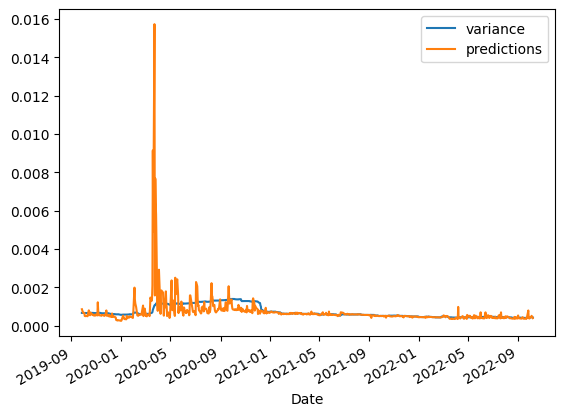

In [16]:
daily_df[['variance', 'predictions']].plot()

## Calculate prediction premium

In [17]:
daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']

/var/folders/69/g6d5lz2103v7cq5z96_w6hhc0000gn/T/ipykernel_1800/2654037141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']


In [18]:
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium
Date,,,,,,,,,,
2019-09-27,36.816666,37.083332,35.950001,36.049999,32.565475,18383574,-0.026011,0.000670,0.000861,0.285075
2019-09-30,36.116665,36.299999,35.033333,36.099998,32.610645,23611185,0.001386,0.000666,0.000679,0.018331
2019-10-01,36.200001,37.066666,35.216667,35.716667,32.264355,30449868,-0.010676,0.000667,0.000670,0.005493
2019-10-03,35.400002,35.733334,34.766666,35.133331,31.737410,20914977,-0.016467,0.000662,0.000663,0.000421
2019-10-04,35.333332,35.833332,34.750000,34.983334,31.601908,26160762,-0.004279,0.000662,0.000507,-0.234891
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920,0.019505,0.000431,0.000412,-0.043656
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465,-0.025077,0.000435,0.000460,0.058756
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228,0.035914,0.000441,0.000515,0.167907


<Axes: xlabel='Date'>

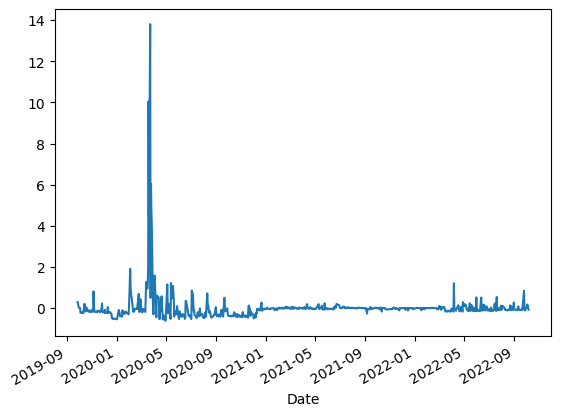

In [19]:
daily_df['prediction_premium'].plot()

In [20]:
daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()
daily_df

/var/folders/69/g6d5lz2103v7cq5z96_w6hhc0000gn/T/ipykernel_1800/2212291564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()


,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std
Date,,,,,,,,,,,
2019-09-27,36.816666,37.083332,35.950001,36.049999,32.565475,18383574,-0.026011,0.000670,0.000861,0.285075,NaN
2019-09-30,36.116665,36.299999,35.033333,36.099998,32.610645,23611185,0.001386,0.000666,0.000679,0.018331,NaN
2019-10-01,36.200001,37.066666,35.216667,35.716667,32.264355,30449868,-0.010676,0.000667,0.000670,0.005493,NaN
2019-10-03,35.400002,35.733334,34.766666,35.133331,31.737410,20914977,-0.016467,0.000662,0.000663,0.000421,NaN
2019-10-04,35.333332,35.833332,34.750000,34.983334,31.601908,26160762,-0.004279,0.000662,0.000507,-0.234891,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920,0.019505,0.000431,0.000412,-0.043656,0.163269
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465,-0.025077,0.000435,0.000460,0.058756,0.163379
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228,0.035914,0.000441,0.000515,0.167907,0.163993


<Axes: xlabel='Date'>

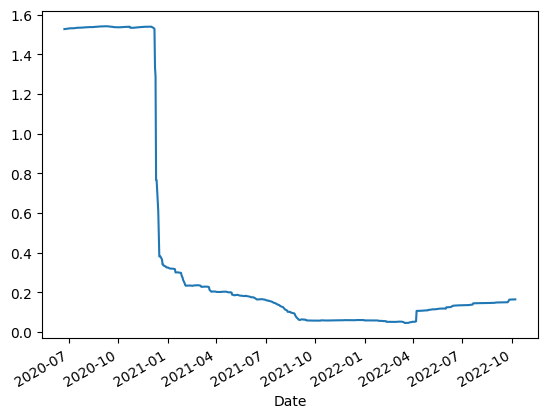

In [21]:
daily_df['premium_std'].plot()

## Deriving signal

In [22]:
daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std'])
                                         else (-1 if (x['prediction_premium']<x['premium_std']*-1) else np.nan),
                                         axis=1)

/var/folders/69/g6d5lz2103v7cq5z96_w6hhc0000gn/T/ipykernel_1800/465529881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std'])


In [23]:
daily_df

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2019-09-27,36.816666,37.083332,35.950001,36.049999,32.565475,18383574,-0.026011,0.000670,0.000861,0.285075,NaN,NaN
2019-09-30,36.116665,36.299999,35.033333,36.099998,32.610645,23611185,0.001386,0.000666,0.000679,0.018331,NaN,NaN
2019-10-01,36.200001,37.066666,35.216667,35.716667,32.264355,30449868,-0.010676,0.000667,0.000670,0.005493,NaN,NaN
2019-10-03,35.400002,35.733334,34.766666,35.133331,31.737410,20914977,-0.016467,0.000662,0.000663,0.000421,NaN,NaN
2019-10-04,35.333332,35.833332,34.750000,34.983334,31.601908,26160762,-0.004279,0.000662,0.000507,-0.234891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920,0.019505,0.000431,0.000412,-0.043656,0.163269,NaN
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465,-0.025077,0.000435,0.000460,0.058756,0.163379,NaN
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228,0.035914,0.000441,0.000515,0.167907,0.163993,1.0


In [24]:
daily_df[daily_df['signal_daily']==-1]

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2021-09-06,67.083336,67.633331,64.916664,65.150002,61.902332,36365391,-0.015988,0.000563,0.000408,-0.274823,0.063650,-1.0
2021-09-13,65.833336,66.216667,65.216667,65.500000,62.234882,10518984,-0.002795,0.000563,0.000524,-0.067986,0.061920,-1.0
2021-10-07,67.000000,67.933334,66.833336,67.699997,64.720459,7587423,0.018887,0.000513,0.000477,-0.070688,0.057050,-1.0
2021-10-12,69.566666,70.566666,68.183334,70.083336,66.998909,18331041,0.007879,0.000510,0.000419,-0.177971,0.058482,-1.0
2021-10-21,68.616669,69.000000,67.683334,68.133331,65.134720,15707487,-0.001955,0.000524,0.000491,-0.062475,0.057359,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-04,76.233330,77.550003,75.650002,76.566666,74.288704,13538427,-0.000435,0.000463,0.000396,-0.144516,0.134323,-1.0
2022-07-05,77.266663,78.300003,76.033333,76.400002,74.126991,14922519,-0.002179,0.000463,0.000396,-0.143865,0.134611,-1.0
2022-07-08,79.366669,80.816666,77.816666,78.666664,76.326218,21179418,-0.002750,0.000447,0.000386,-0.135579,0.135114,-1.0


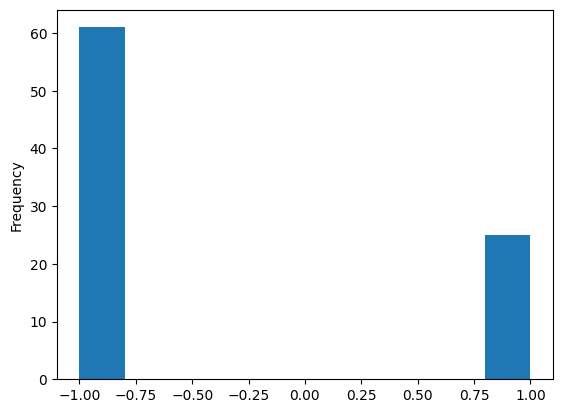

In [25]:
daily_df['signal_daily'].plot(kind='hist')
plt.show()

In [26]:
daily_df['signal_daily'] = daily_df['signal_daily'].shift()
daily_df

/var/folders/69/g6d5lz2103v7cq5z96_w6hhc0000gn/T/ipykernel_1800/2560492430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['signal_daily'] = daily_df['signal_daily'].shift()


,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2019-09-27,36.816666,37.083332,35.950001,36.049999,32.565475,18383574,-0.026011,0.000670,0.000861,0.285075,NaN,NaN
2019-09-30,36.116665,36.299999,35.033333,36.099998,32.610645,23611185,0.001386,0.000666,0.000679,0.018331,NaN,NaN
2019-10-01,36.200001,37.066666,35.216667,35.716667,32.264355,30449868,-0.010676,0.000667,0.000670,0.005493,NaN,NaN
2019-10-03,35.400002,35.733334,34.766666,35.133331,31.737410,20914977,-0.016467,0.000662,0.000663,0.000421,NaN,NaN
2019-10-04,35.333332,35.833332,34.750000,34.983334,31.601908,26160762,-0.004279,0.000662,0.000507,-0.234891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,99.349998,101.349998,96.250000,100.949997,98.481522,28502920,0.019505,0.000431,0.000412,-0.043656,0.163269,NaN
2022-10-03,101.449997,103.000000,98.099998,98.449997,96.042648,21407465,-0.025077,0.000435,0.000460,0.058756,0.163379,NaN
2022-10-04,100.250000,102.449997,99.849998,102.050003,99.554642,14768228,0.035914,0.000441,0.000515,0.167907,0.163993,NaN


## Merging daily data with intraday data

In [27]:
intraday_df['date'] = pd.to_datetime(intraday_df['date'])

In [29]:
print("intraday_df['date'].dtype:", intraday_df['date'].dtype)

intraday_df['date'].dtype: datetime64[ns]


In [30]:
final_df = intraday_df.reset_index()\
                            .merge(daily_df[['signal_daily']].reset_index(),
                                   left_on='date',
                                   right_on='Date')\
                            .drop(['date','Date'], axis=1)\
                            .set_index('datetime')

In [31]:
final_df

,open,high,low,close,volume,signal_daily
datetime,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN
...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN


In [32]:
final_df['rsi'] = pandas_ta.rsi(close=final_df['close'],
                                length=20)

In [33]:
final_df

,open,high,low,close,volume,signal_daily,rsi
datetime,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN
...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102


In [34]:
final_df['lband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,0]

In [35]:
final_df

,open,high,low,close,volume,signal_daily,rsi,lband
datetime,,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN,NaN
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN,NaN
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN,NaN
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933,105.343967
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305,105.384773
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102,105.426261


In [36]:
final_df['uband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,2]

In [37]:
final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband
datetime,,,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN,NaN,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN,NaN,NaN
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN,NaN,NaN
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN,NaN,NaN
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933,105.343967,106.676033
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305,105.384773,106.705227
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102,105.426261,106.713739


In [38]:
final_df['signal_intraday'] = final_df.apply(lambda x: 1 if (x['rsi']>70)&
                                                            (x['close']>x['uband'])
                                             else (-1 if (x['rsi']<30)&
                                                         (x['close']<x['lband']) else np.nan),
                                             axis=1)
final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband,signal_intraday
datetime,,,,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933,105.343967,106.676033,NaN
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305,105.384773,106.705227,NaN
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102,105.426261,106.713739,NaN


## Defining entry positions

In [39]:
final_df['return_sign'] = final_df.apply(lambda x: -1 if (x['signal_daily']==1)&(x['signal_intraday']==1)
                                        else (1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1) else np.nan),
                                        axis=1)
final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return_sign
datetime,,,,,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933,105.343967,106.676033,NaN,NaN
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305,105.384773,106.705227,NaN,NaN
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102,105.426261,106.713739,NaN,NaN


In [40]:
final_df[final_df['return_sign']==1]

,open,high,low,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return_sign
datetime,,,,,,,,,,,
2021-10-08 09:39:00+05:30,67.05,67.15,66.90,66.95,239364,-1.0,29.206407,67.000277,68.014723,-1.0,1.0
2021-10-08 09:42:00+05:30,66.95,67.05,66.80,66.85,222483,-1.0,27.007489,66.891328,68.038672,-1.0,1.0
2021-10-22 13:00:00+05:30,66.95,67.10,66.85,66.95,113427,-1.0,29.523473,67.048972,67.901028,-1.0,1.0
2021-10-22 13:03:00+05:30,66.95,67.05,66.90,66.95,98010,-1.0,29.523473,66.976128,67.888872,-1.0,1.0
2021-10-22 13:18:00+05:30,66.90,66.90,66.70,66.70,155829,-1.0,27.981270,66.740514,67.774486,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05 15:00:00+05:30,76.45,76.50,76.30,76.35,165351,-1.0,25.395672,76.392885,76.782115,-1.0,1.0
2022-07-05 15:03:00+05:30,76.35,76.35,76.15,76.25,168096,-1.0,23.183437,76.326098,76.808902,-1.0,1.0
2022-07-05 15:27:00+05:30,76.45,76.45,76.10,76.15,373077,-1.0,29.065770,76.226228,76.733772,-1.0,1.0


In [41]:
final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign']\
                                  .transform(lambda x: x.ffill())

In [42]:
final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return_sign
datetime,,,,,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933,105.343967,106.676033,NaN,NaN
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305,105.384773,106.705227,NaN,NaN
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102,105.426261,106.713739,NaN,NaN


In [43]:
final_df['return'] = final_df['close'].pct_change()
final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return_sign,return
datetime,,,,,,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN,NaN,NaN,NaN,NaN,0.005450
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN,NaN,NaN,NaN,NaN,0.001355
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN,NaN,NaN,NaN,NaN,-0.002706
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933,105.343967,106.676033,NaN,NaN,-0.000470
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305,105.384773,106.705227,NaN,NaN,0.000941
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102,105.426261,106.713739,NaN,NaN,-0.001410


In [44]:
final_df['forward_return'] = final_df['return'].shift(-1)
final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return_sign,return,forward_return
datetime,,,,,,,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.005450
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN,NaN,NaN,NaN,NaN,0.005450,0.001355
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN,NaN,NaN,NaN,NaN,0.001355,-0.002706
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN,NaN,NaN,NaN,NaN,-0.002706,0.001357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933,105.343967,106.676033,NaN,NaN,-0.000470,0.000941
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305,105.384773,106.705227,NaN,NaN,0.000941,-0.001410
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102,105.426261,106.713739,NaN,NaN,-0.001410,0.000000


In [45]:
final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']
final_df

,open,high,low,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return_sign,return,forward_return,strategy_return
datetime,,,,,,,,,,,,,,
2019-09-27 09:15:00+05:30,36.80,36.80,36.60,36.70,447075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2019-09-27 09:18:00+05:30,36.75,36.85,36.70,36.70,184629,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.005450,NaN
2019-09-27 09:21:00+05:30,36.70,36.95,36.65,36.90,230931,NaN,NaN,NaN,NaN,NaN,NaN,0.005450,0.001355,NaN
2019-09-27 09:24:00+05:30,36.90,36.95,36.85,36.95,124314,NaN,NaN,NaN,NaN,NaN,NaN,0.001355,-0.002706,NaN
2019-09-27 09:27:00+05:30,36.95,37.10,36.80,36.85,396114,NaN,NaN,NaN,NaN,NaN,NaN,-0.002706,0.001357,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07 15:15:00+05:30,106.25,106.35,106.20,106.25,376335,NaN,63.633933,105.343967,106.676033,NaN,NaN,-0.000470,0.000941,NaN
2022-10-07 15:18:00+05:30,106.30,106.45,106.20,106.35,501269,NaN,65.576305,105.384773,106.705227,NaN,NaN,0.000941,-0.001410,NaN
2022-10-07 15:21:00+05:30,106.30,106.35,106.15,106.20,301950,NaN,60.476102,105.426261,106.713739,NaN,NaN,-0.001410,0.000000,NaN


In [46]:
daily_returns = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()

In [47]:
daily_returns

datetime
2019-09-27 00:00:00+05:30    0.000000
2019-09-28 00:00:00+05:30    0.000000
2019-09-29 00:00:00+05:30    0.000000
2019-09-30 00:00:00+05:30    0.000000
2019-10-01 00:00:00+05:30    0.000000
                               ...   
2022-10-03 00:00:00+05:30    0.000000
2022-10-04 00:00:00+05:30    0.000000
2022-10-05 00:00:00+05:30    0.000000
2022-10-06 00:00:00+05:30   -0.011709
2022-10-07 00:00:00+05:30    0.000000
Freq: D, Name: strategy_return, Length: 1107, dtype: float64

## Calculating returns

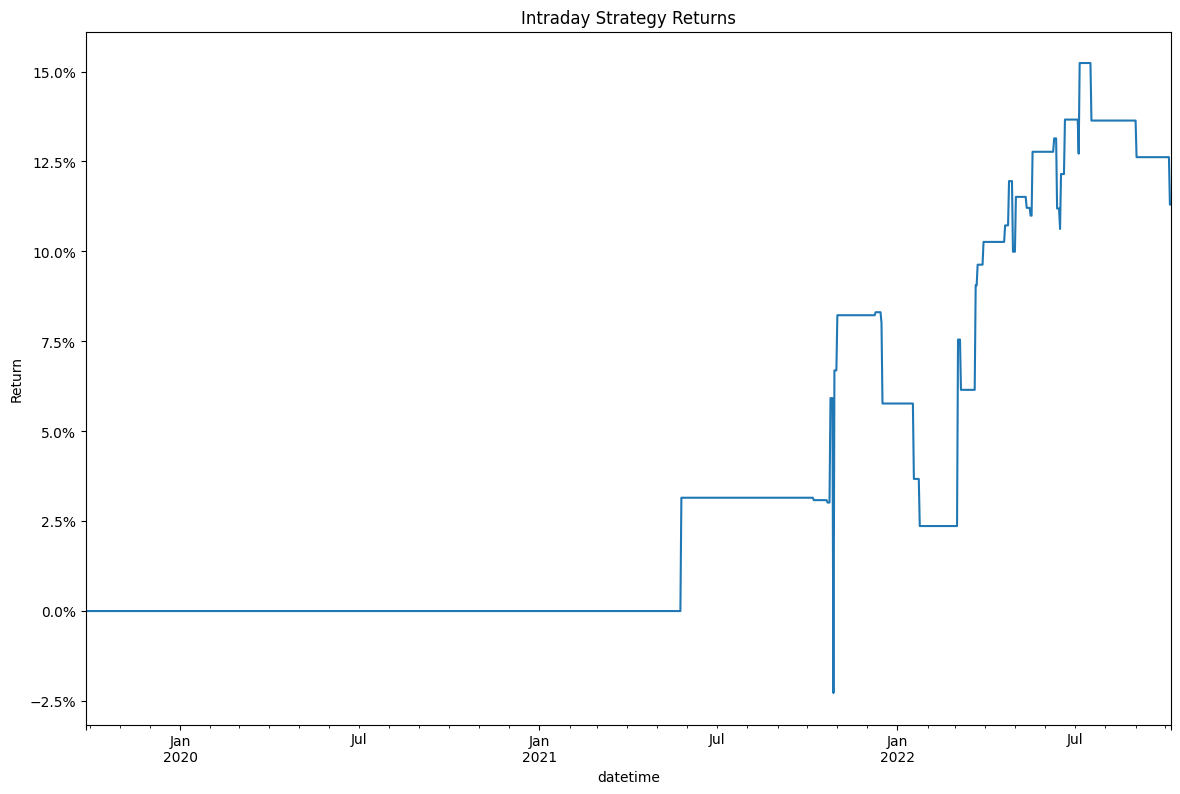

In [48]:
strategy_cumulative_return = np.exp(np.log1p(daily_returns).cumsum()).sub(1)

strategy_cumulative_return.plot(figsize=(14,9))

plt.title('Intraday Strategy Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()